In [4]:
import mdtraj
import nglview
import prody
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy


import sys
sys.path.append('/home/diego/Myusr/src/UIBCDFGitHub/LabTools/')
import MolLabTools as mollab
import MDLabTools as mdlab

#sns.set(style="ticks")
plt.style.use(u'ggplot')

/home/diego/Myopt/Miniconda/miniconda3/envs/ENM/lib/python3.6/site-packages/MDAnalysis/due.py:88: UserWarning: No module named 'duecredit'
  warnings.warn(str(err))
/home/diego/Myopt/Miniconda/miniconda3/envs/ENM/lib/python3.6/site-packages/pyemma/__init__.py:91: UserWarning: You are not using the latest release of PyEMMA. Latest is 2.5.2, you have 2.4.
  .format(latest=latest, current=current), category=UserWarning)


# G6PD

https://www.rcsb.org/structure/2BHL <br>
THE 25 N-TERMINAL RESIDUES HAVE BEEN REMOVED AND THE FIRST RESIDUE IS VALINE, NOT HISTIDINE


https://www.rcsb.org/structure/2BH9 <br>
RESIDUES 26-514


https://www.rcsb.org/structure/5VFL


In [5]:
def mode2vect(modes,n_mode=0):
    m=modes[:,n_mode]
    nalphas=int(m.shape[0]/3)
    return m.reshape(nalphas,3)

def mode2norm(modes,n_mode=0):
    m=modes[:,n_mode]
    nalphas=int(m.shape[0]/3)
    a=m.reshape(nalphas,3)
    return np.linalg.norm(a,axis=-1)

In [6]:
def rgb2hex(rgb):
    
    r = int(rgb[0]) ; g = int(rgb[1]) ; b = int(rgb[2])
    hex = "0x{:02x}{:02x}{:02x}".format(r,g,b)
    return hex

def colorscale2hex(values,color_min=[255,255,255],color_max=[255,0,0],value_min=None,value_max=None,num_bins=254):
    
    if not value_min:
        value_min=values.min()
    if not value_max:
        value_max=values.max()
        
    color_bin=(np.array(color_max)-np.array(color_min))/float(num_bins)
    scale_bin=(value_max-value_min)/float(num_bins)
    
    colors_hex=[]
    for val in values:
        val_bin=(val-value_min)/scale_bin
        rgb_from_val=(color_bin*val_bin).astype(int)+np.array(color_min)
        colors_hex.append(rgb2hex(rgb_from_val))
    
    return colors_hex
    

In [7]:
def make_view_mode(Cas_mdtraj,modes,n_mode=1,max_amplitude=0.2,frequency=0.01):
    
    m=modes[:,n_mode]
    
    values=mode2norm(modes,n_mode)
    mode_vect=mode2vect(modes,n_mode)
    amplitude=max_amplitude/values.max()
    
    shape_traj=mdtraj_CAs.xyz.shape
    dtype_traj=mdtraj_CAs.xyz.dtype
    
    num_steps=int(1.0/0.01)
    oscillation_frames=np.zeros((num_steps,shape_traj[1],shape_traj[2]),dtype_traj)
    orig_frame=mdtraj_CAs.xyz[0]
    
    for ii in range(num_steps):
        oscillation_frames[ii]=orig_frame+amplitude*mode_vect*np.sin(2*np.pi*ii*frequency)
    
    tmp_mdtraj=deepcopy(mdtraj_CAs)
    tmp_mdtraj.xyz=oscillation_frames
    colors = colorscale2hex(values,value_min=0.0)
    tmp_view=nglview.show_mdtraj(tmp_mdtraj)
    tmp_view.clear()
    tmp_view.add_backbone()
    tmp_view._set_color_by_residue(colors)
    return tmp_view

## 2BHL

In [8]:
pdbs_dir='pdbs/'
pdb_code='2BHL'
pdb_file=pdbs_dir+pdb_code+'.pdb'

In [9]:
mdtraj_sys=mdtraj.load(pdb_file)
mdtraj_sys=mdtraj_sys.remove_solvent()

In [10]:
view = nglview.show_mdtraj(mdtraj_sys)
view.clear()
view.add_cartoon(selection=":A", color='purple')
view.add_cartoon(selection=":B", color='orange')
view.add_spacefill(selection=":C")
view.add_spacefill(selection=":D")
view

NGLWidget()

In [21]:
lista_CAs=mdtraj_sys.topology.select('name CA')
mdtraj_CAs=mdtraj_sys.atom_slice(lista_CAs)
num_CAs=len(lista_CAs)
print('Num CAs:',num_CAs)

Num CAs: 958


In [12]:
view = nglview.show_mdtraj(mdtraj_CAs)
view.clear()
view.add_backbone()
view

NGLWidget()

In [25]:
prody_2bhl = prody.parsePDB(pdb_file)
calphas = prody_2bhl.select('calpha and (chain A or chain B)')
anm = prody.ANM('2BHL')
anm.buildHessian(calphas,cutoff=15.0)
anm.calcModes(None)
modes=anm.getEigvecs().round(3)

@> 7903 atoms and 1 coordinate set(s) were parsed in 0.09s.
@> Hessian was built in 0.64s.
@> 2868 modes were calculated in 5.20s.


In [43]:
view_mode=make_view_mode(mdtraj_CAs,modes,n_mode=0,max_amplitude=0.5,frequency=0.05)
view_mode.add_ball_and_stick('365')
view_mode

NGLWidget(count=100)

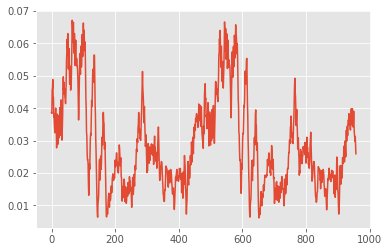

In [31]:
plt.plot(mode2norm(modes,0))

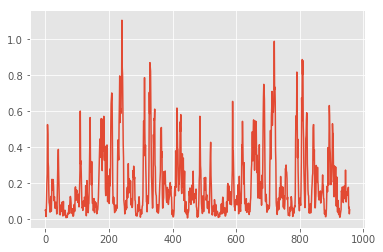

In [35]:
high_freq_modes=np.zeros(num_CAs)
num_high_freq_modes=10
for ii in range(3*num_CAs-num_high_freq_modes-6,3*num_CAs-6):
    high_freq_modes+=mode2norm(modes,ii)

plt.plot(high_freq_modes)

# GNM

In [ ]:
prody_2bhl = prody.parsePDB(pdb_file)

In [ ]:
calphas = prody_2bhl.select('calpha and (chain A or chain B)')

In [ ]:
anm = prody.ANM('2BHL')

In [ ]:
anm.buildHessian(calphas,cutoff=15.0)

In [ ]:
Hessian=anm.getHessian()

In [ ]:
print(Hessian)

In [ ]:
anm.calcModes()

In [ ]:
anm.getEigvals().round(3)

In [ ]:
anm.getEigvecs().round(3)

In [ ]:
anm.getCovariance().round(2)

In [ ]:
prody.showContactMap(anm)

In [ ]:
prody.showCrossCorr(anm)

In [ ]:
covariance=anm.getCovariance()

--------------

In [ ]:
calphas_indices=calphas.getIndices()

In [ ]:
num_calphas=Kirchhoff_matrix.shape[0]

sel_calphas_view=""
for ii in calphas_indices:
    sel_calphas_view+=str(ii)+','
sel_calphas_view=sel_calphas_view[:-1]

positions_calphas=calphas.getCoords()

view = nglview.show_mdtraj(mdtraj_sys)
view.clear()

view.add_cartoon(selection=":A", color='purple')
view.add_cartoon(selection=":B", color='orange')
view.add_spacefill(selection="@"+sel_calphas_view)

for ii in range(num_calphas):
    position_ii=positions_calphas[ii]
    for jj in range(ii+1,num_calphas):
        position_jj=positions_calphas[jj]
        if Kirchhoff_matrix[ii,jj]:
            view.shape.add_cylinder(list(position_ii), list(position_jj), [1.0,0.0,0.0], 0.1)
            #add_cylinder(position1, position2, color, radius, name)
view

In [ ]:
gnm.calcModes(20,zeros=False)

In [ ]:
eigvals=gnm.getEigvals().round(3)
eigvects=gnm.getEigvecs().round(3)

In [ ]:
plt.plot(eigvals)

In [ ]:
num_mode=0
plt.plot(eigvects[:,num_mode])

In [ ]:
gnm.getCovariance().round(2)

In [ ]:
prody.showContactMap(gnm);

In [ ]:
prody.showCrossCorr(gnm);

In [ ]:
hinges = gnm[:2].getHinges

In [ ]:
hinges()

In [ ]:
prody.showMode(gnm[0])

In [ ]:
prody.showSqFlucts(gnm[0], hinge=True)

In [ ]:
prody_2bhl.getBetas()

In [ ]:
calpha_betas=calphas.getBetas()

In [ ]:
plt.plot(calpha_betas)